In [14]:
import os
import glob
import numpy as np
import pylab as pl
import cPickle as pkl
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
%matplotlib notebook

In [8]:
simulated_datafiles = glob.glob('/home/julianarhee/Repositories/retinotopy-mapper/tests/simulation/structs/*FFT*_simulated.pkl')
print(simulated_datafiles)

['/home/julianarhee/Repositories/retinotopy-mapper/tests/simulation/structs/D_target_FFT_V-Right_0_(1, 1)_simulated.pkl', '/home/julianarhee/Repositories/retinotopy-mapper/tests/simulation/structs/D_target_FFT_V-Left_0_(1, 1)_simulated.pkl', '/home/julianarhee/Repositories/retinotopy-mapper/tests/simulation/structs/D_target_FFT_H-Down_0_(1, 1)_simulated.pkl', '/home/julianarhee/Repositories/retinotopy-mapper/tests/simulation/structs/D_target_FFT_H-Up_0_(1, 1)_simulated.pkl']


In [24]:
def load_cond_fft(simulated_datafiles, cond):
    df = [f for f in simulated_datafiles if cond in f][0]

    with open(df, 'rb') as f:
        ft = pkl.load(f)
    return ft


def correct_phase_wrap(phase):
        
    corrected_phase = phase.copy()
    
    corrected_phase[phase<0] =- phase[phase<0]
    corrected_phase[phase>0] = (2*np.pi) - phase[phase>0]
    
    return corrected_phase

In [20]:
ft_left = load_cond_fft(simulated_datafiles, 'V-Left')
ft_right = load_cond_fft(simulated_datafiles, 'V-Right')
ft_top = load_cond_fft(simulated_datafiles, 'H-Down')
ft_bottom = load_cond_fft(simulated_datafiles, 'H-Up')
print ft_left.keys()

['phase_map', 'ft', 'ft_real', 'target_freq', 'freqs', 'binsize', 'dynrange', 'fps', 'mean_intensity', 'reduce_factor', 'nframes', 'ft_imag', 'target_bin']


<IPython.core.display.Javascript object>


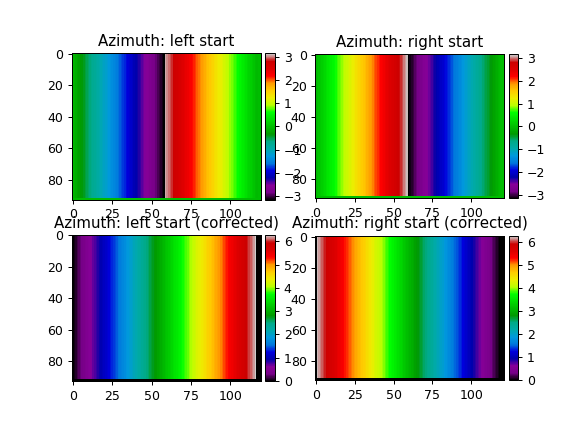

In [26]:
fig, axes = pl.subplots(2,2) #pl.figure()

# Show FFT left-start phasemap:
axes[0, 0].set_title('Azimuth: left start')
im1 = axes[0, 0].imshow(ft_left['phase_map'], cmap='nipy_spectral', vmin=-np.pi, vmax=np.pi)

divider = make_axes_locatable(axes[0, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# Show FFT right-start phasemap:
axes[0, 1].set_title('Azimuth: right start')
im1 = axes[0, 1].imshow(ft_right['phase_map'], cmap='nipy_spectral', vmin=-np.pi, vmax=np.pi)

divider = make_axes_locatable(axes[0, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# Correct LEFT phasemap:
corrected_left = correct_phase_wrap(ft_left['phase_map'])
axes[1, 0].set_title('Azimuth: left start (corrected)')
im1 = axes[1, 0].imshow(corrected_left, cmap='nipy_spectral', vmin=0, vmax=2*np.pi)

divider = make_axes_locatable(axes[1, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

# Correct RIGHT phasemap:
corrected_right = correct_phase_wrap(ft_right['phase_map'])
axes[1, 1].set_title('Azimuth: right start (corrected)')
im1 = axes[1, 1].imshow(corrected_right, cmap='nipy_spectral', vmin=0, vmax=2*np.pi)

divider = make_axes_locatable(axes[1, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')


In [27]:
def convert_values(oldval, newmin, newmax, oldmax=None, oldmin=None):
    oldrange = (oldmax - oldmin)
    newrange = (newmax - newmin)
    newval = (((oldval - oldmin) * newrange) / oldrange) + newmin
    return newval


In [34]:
print corrected_right.shape
screen_left = -1*corrected_right.shape[0]/2.
screen_right = corrected_right.shape[0]/2.

(93, 122)


In [42]:
linX = convert_values(corrected_right, screen_right, screen_left, #screen_left, #screen_left, screen_right,
                      oldmax=2*np.pi, oldmin=0)
linX_r = convert_values(corrected_right, screen_left, screen_right, #screen_left, #screen_left, screen_right,
                      oldmax=2*np.pi, oldmin=0)

                      #oldmax=0, oldmin=2*np.pi)  # If cond is 'right':  positive values = 0, negative values = 2pi
# linY = convert_values(mean_phase_el, screen_upper, screen_lower, #screen_lower, screen_upper,
#                       oldmax=2*np.pi, oldmin=0)
#                       #oldmax=0, oldmin=2*np.pi)  # If cond is 'right':  positive values = 0, negative values = 2pi


In [43]:
print("New min/max:", linX.min(), linX.max())

('New min/max:', -46.081011141330634, 46.5)


<IPython.core.display.Javascript object>


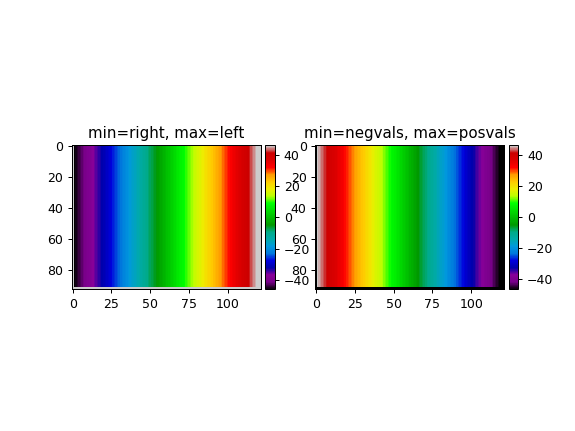

In [54]:
fig, ax = pl.subplots(1,2)

ax[0].set_title('min=right, max=left')
im0 = ax[0].imshow(linX, cmap='nipy_spectral')

divider = make_axes_locatable(ax[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im0, cax=cax, orientation='vertical')


ax[1].set_title('min=negvals, max=posvals')
im1 = ax[1].imshow(linX_r,  cmap='nipy_spectral')

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
